📁 Upload heart_cleaned.csv


Saving heart_cleaned.csv to heart_cleaned.csv
✅ Dataset Loaded
Training samples: 241
Testing samples: 61


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.6563 - loss: 0.6784 - val_accuracy: 0.5600 - val_loss: 0.6747
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6953 - loss: 0.6560 - val_accuracy: 0.5600 - val_loss: 0.6671
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6639 - loss: 0.6447 - val_accuracy: 0.5600 - val_loss: 0.6610
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7340 - loss: 0.6308 - val_accuracy: 0.5600 - val_loss: 0.6567
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6270 - loss: 0.6385 - val_accuracy: 0.5600 - val_loss: 0.6535
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6625 - loss: 0.6238 - val_accuracy: 0.5600 - val_loss: 0.6511
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6561 - loss: 0.6115 - val_accuracy: 0.5600 - val_loss: 0.6482
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6843 - loss: 0.5940 - val_accuracy: 0.6000 - 

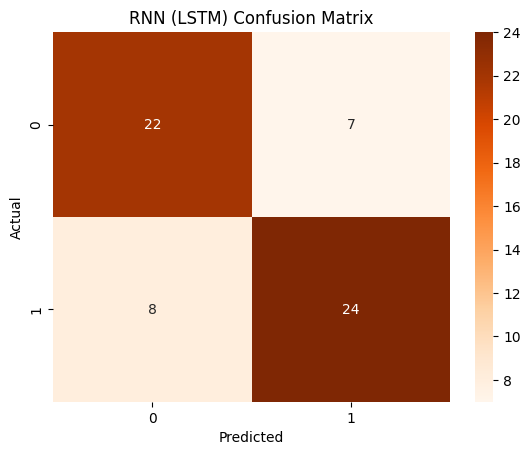

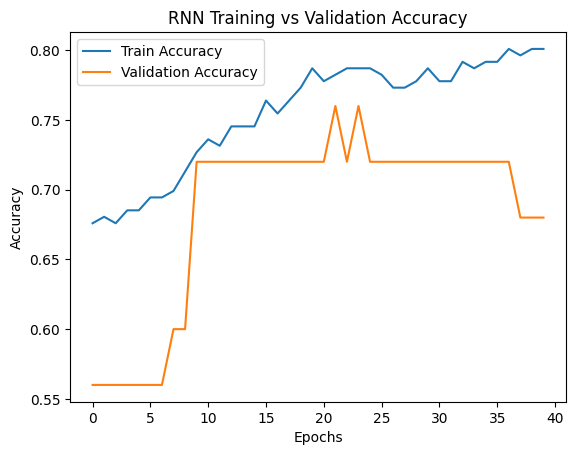


📘 Milestone: Specialized Deep Learning model (RNN) applied successfully.


In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

print("📁 Upload heart_cleaned.csv")
uploaded = files.upload()

df = pd.read_csv("heart_cleaned.csv")
print("✅ Dataset Loaded")


X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_rnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_rnn, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

model = Sequential()

model.add(LSTM(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ RNN (LSTM) Evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("RNN (LSTM) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n📘 Milestone: Specialized Deep Learning model (RNN) applied successfully.")
